<a href="https://colab.research.google.com/github/marymuench/Value-of-Masters-Degree-in-Different-Fields/blob/main/MaryMuench_DataWrangling_Mod_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway # anova
from scipy.stats import ttest_ind # t-test

Mary Muench | u1196723
# Data Wrangling Module 3 Assignment

Please Note: The Canvas Page would not let me submit both a website link and an HTML file, so there should be an HTML file saved in the files for this notebook holding the HTML for my webpage, as well as the link is pasted in my notebook and in the assignment instructions.

#Question

**Question**: Based on percentage of employees with masters as an indication of necessity paired with how much wages are increased, in what categories of occupations is it most valuable to pursue a masters degree?

# Read in the Data

I will be utilizing the masters degree webpage provided on the assignment page. As such, I did not need to additionally check that it was permissable to scrape this page because it was already approved.

In [ ]:
masters_raw = requests.get('https://www.bls.gov/careeroutlook/2015/article/should-i-get-a-masters-degree.htm').text
masters_soup = BeautifulSoup(masters_raw,'html.parser')

In [ ]:
import html

with open('masters_data.html','w') as f:
  f.write(masters_raw)

In [ ]:
import json

with open('masters_data.html','w') as f:
  json.dump(masters_raw,f)

In [ ]:
print(masters_soup.prettify())

<!DOCTYPE HTML>
<html lang="en-us">
 <head>
  <!-- P2 -->
  <title>
   Should I get a master’s degree? : Career Outlook: U.S. Bureau of Labor Statistics
  </title>
  <meta charset="utf-8"/>
  <meta content="This article shows wage premiums for workers with a masterâs degree by occupationâand offers a few questions to ask yourself when considering graduate school." name="description">
   <meta content="Elka Torpey and Dalton Terrell" name="author"/>
   <meta content="2015-09-16" name="date"/>
   <meta content="" name="keywords"/>
   <meta content="" name="surveys"/>
   <meta content="" name="programs"/>
   <!-- START include/global/head_cms.stm -->
   <script id="_fed_an_ua_tag" language="javascript" src="https://dap.digitalgov.gov/Universal-Federated-Analytics-Min.js?agency=DOL&amp;subagency=BLS&amp;yt=true">
   </script>
   <script>
    (function (g) {
var d = document, am = d.createElement('script'), h = d.head || d.getElementsByTagName("head")[0], fsr = 'fsReady',
aex = {
  "src

In [ ]:
masters = masters_soup.find_all('table')
print(masters[0])

<table cellpadding="0" cellspacing="0" class="regular" id="MA.xlsx" xborder="1"><caption><span class="tableTitle">Table 1. Selected business occupations in which workers with a master's degree earned a premium over workers with a bachelor's degree, 2013</span></caption>
<thead>
<tr>
<th class="stubhead" colspan="1" rowspan="1">Occupation</th>
<th colspan="1" rowspan="1">Employment with bachelor's degree</th>
<th colspan="1" rowspan="1">Percent with bachelor's degree</th>
<th colspan="1" rowspan="1">Employment with master's degree</th>
<th colspan="1" rowspan="1">Percent with master's degree</th>
<th colspan="1" rowspan="1">Median annual wage for bachelor's degree</th>
<th colspan="1" rowspan="1">Median annual wage for master's degree</th>
<th colspan="1" rowspan="1">Wage premium amount<a href="#MA.xlsx.f.1"><span class="footnoteid" title="The wage premium represents the wage increase for workers with a master's degree over that for workers with a bachelor's degree in the occupation. ">

In [ ]:
# Ensure the correct amount of tables have been found 
print(len(masters))


6


This is more than the 5 we want, so check the last element.

In [ ]:
masters[-1]

<table border="1" cellpadding="0" cellspacing="0" width="100%">
<tbody>
<tr>
<td width="34%"><a href="https://www.bls.gov/ooh/Life-Physical-and-Social-Science/Anthropologists-and-archeologists.htm" rel="noopener noreferrer" target="_blank">Anthropologists and archeologists</a></td>
<td width="33%"><a href="https://www.bls.gov/ooh/Community-and-Social-Service/Social-workers.htm" rel="noopener noreferrer" target="_blank">Healthcare social workers</a></td>
<td width="33%"><a href="https://www.bls.gov/ooh/healthcare/nurse-anesthetists-nurse-midwives-and-nurse-practitioners.htm" rel="noopener noreferrer" target="_blank">Nurse practitioners</a></td>
</tr>
<tr>
<td width="34%"><a href="https://www.bls.gov/ooh/education-training-and-library/curators-museum-technicians-and-conservators.htm" rel="noopener noreferrer" target="_blank">Archivists</a></td>
<td width="33%"><a href="https://www.bls.gov/ooh/life-physical-and-social-science/historians.htm" rel="noopener noreferrer" target="_blank">Histo

In [ ]:
masters = masters[0:5]

In [ ]:
print(len(masters))

5


In [ ]:
# First, find category headers
masters[0].find_all('th')

[<th class="stubhead" colspan="1" rowspan="1">Occupation</th>,
 <th colspan="1" rowspan="1">Employment with bachelor's degree</th>,
 <th colspan="1" rowspan="1">Percent with bachelor's degree</th>,
 <th colspan="1" rowspan="1">Employment with master's degree</th>,
 <th colspan="1" rowspan="1">Percent with master's degree</th>,
 <th colspan="1" rowspan="1">Median annual wage for bachelor's degree</th>,
 <th colspan="1" rowspan="1">Median annual wage for master's degree</th>,
 <th colspan="1" rowspan="1">Wage premium amount<a href="#MA.xlsx.f.1"><span class="footnoteid" title="The wage premium represents the wage increase for workers with a master's degree over that for workers with a bachelor's degree in the occupation. ">(1)</span></a></th>,
 <th colspan="1" rowspan="1">Wage premium percent</th>,
 <th headers="MA.xlsx.r " id="MA.xlsx.r.1">
 <p class="sub0">Securities, commodities, and financial services sales agents</p>
 </th>,
 <th headers="MA.xlsx.r " id="MA.xlsx.r.2">
 <p class="sub

In [ ]:
masters[0].find_all('p',{'class':'sub0'})

[<p class="sub0">Securities, commodities, and financial services sales agents</p>,
 <p class="sub0">Logisticians</p>,
 <p class="sub0">Transportation, storage, and distribution managers</p>,
 <p class="sub0">Financial managers</p>,
 <p class="sub0">Market research analysts and marketing specialists</p>,
 <p class="sub0">Marketing and sales managers</p>,
 <p class="sub0">Property, real estate, and community association managers</p>]

In [ ]:
masters[0].find_all('th')[0:9]

[<th class="stubhead" colspan="1" rowspan="1">Occupation</th>,
 <th colspan="1" rowspan="1">Employment with bachelor's degree</th>,
 <th colspan="1" rowspan="1">Percent with bachelor's degree</th>,
 <th colspan="1" rowspan="1">Employment with master's degree</th>,
 <th colspan="1" rowspan="1">Percent with master's degree</th>,
 <th colspan="1" rowspan="1">Median annual wage for bachelor's degree</th>,
 <th colspan="1" rowspan="1">Median annual wage for master's degree</th>,
 <th colspan="1" rowspan="1">Wage premium amount<a href="#MA.xlsx.f.1"><span class="footnoteid" title="The wage premium represents the wage increase for workers with a master's degree over that for workers with a bachelor's degree in the occupation. ">(1)</span></a></th>,
 <th colspan="1" rowspan="1">Wage premium percent</th>]

In [ ]:
# Now, find table values
masters[1].find_all('td', {'class':''})

[<td>170,873</td>,
 <td>23%</td>,
 <td>338,917</td>,
 <td>46%</td>,
 <td>$52,000</td>,
 <td>$75,000</td>,
 <td>$23,000</td>,
 <td>44%</td>,
 <td>104,060</td>,
 <td>33</td>,
 <td>42,953</td>,
 <td>14</td>,
 <td>30,000</td>,
 <td>43,000</td>,
 <td>13,000</td>,
 <td>43</td>,
 <td>1,263,179</td>,
 <td>43</td>,
 <td>1,407,469</td>,
 <td>48</td>,
 <td>42,100</td>,
 <td>54,000</td>,
 <td>11,900</td>,
 <td>28</td>,
 <td>270,998</td>,
 <td>41</td>,
 <td>338,808</td>,
 <td>51</td>,
 <td>45,000</td>,
 <td>56,000</td>,
 <td>11,000</td>,
 <td>24</td>,
 <td>69,965</td>,
 <td>33</td>,
 <td>107,508</td>,
 <td>51</td>,
 <td>42,000</td>,
 <td>52,000</td>,
 <td>10,000</td>,
 <td>24</td>,
 <td>108,511</td>,
 <td>34</td>,
 <td>60,686</td>,
 <td>19</td>,
 <td>45,000</td>,
 <td>55,000</td>,
 <td>10,000</td>,
 <td>22</td>,
 <td>122,980</td>,
 <td>13</td>,
 <td>288,997</td>,
 <td>30</td>,
 <td>43,800</td>,
 <td>50,000</td>,
 <td>6,200</td>,
 <td>14</td>]

In [ ]:
business = {}
education = {}
healthcare = {}
stem = {}
other = {}

# FIX FOOTNOTES ISSUE

for i in range(5):
   # 7 rows, 8 columns


  cur_table = masters[i]
  # first get column headers
  col_headers = cur_table.find_all('th', {'class':''})[0:9]

  # next, get row headers
  row_headers = cur_table.find_all('p',{'class':'sub0'})

  # now, get values. these are done by row
  values = cur_table.find_all('td', {'class':''})

  rows = []
  for row in row_headers:
    rows.append(row.text)

  col1 = []
  col2 = []
  col3 = []
  col4 = []
  col5 = []
  col6 = []
  col7 = []
  col8 = []

  col_index = 1
  for val in values:
    # first, clean values so we can remove commas, 
    # percentages, and dollar signs, and convert values to integers
    val = val.text 
    val = val.replace(',','')
    val = val.replace('%','')
    val = val.replace('$','')
    val = int(val)
    if(col_index == 1):
      col1.append(val)
    elif(col_index == 2):
      col2.append(val)
    elif(col_index == 3):
      col3.append(val)
    elif(col_index == 4):
      col4.append(val)
    elif(col_index == 5):
      col5.append(val)
    elif(col_index == 6):
      col6.append(val)
    elif(col_index == 7):
      col7.append(val)
    elif(col_index == 8):
      col8.append(val)

    col_index = col_index + 1
    if(col_index == 9):
      col_index = 1

  table = {cur_table.find_all('th')[0].text: rows,
           col_headers[0].text: col1,
           col_headers[1].text: col2,
           col_headers[2].text: col3,
           col_headers[3].text: col4,
           col_headers[4].text: col5,
           col_headers[5].text: col6,
           col_headers[6].text: col7,
           col_headers[7].text: col8}

  # business table
  if(i == 0):
    business = table
  # education
  elif(i == 1):
    education = table
  # healthcare and social service
  elif(i == 2):
    healthcare = table
  # stem
  elif(i == 3):
    stem = table
  # other
  elif(i == 4):
    other = table
    


In [ ]:
business

{"Employment with bachelor's degree": [113110,
  33098,
  41935,
  400770,
  114105,
  380429,
  92579],
 "Employment with master's degree": [32865,
  8239,
  15415,
  182678,
  49705,
  125900,
  23380],
 "Median annual wage for bachelor's degree": [90000,
  54000,
  62000,
  78000,
  65000,
  80000,
  56000],
 "Median annual wage for master's degree": [170000,
  82000,
  90000,
  110000,
  90000,
  110000,
  76000],
 'Occupation': ['Securities, commodities, and financial services sales agents',
  'Logisticians',
  'Transportation, storage, and distribution managers',
  'Financial managers',
  'Market research analysts and marketing specialists',
  'Marketing and sales managers',
  'Property, real estate, and community association managers'],
 "Percent with bachelor's degree": [54, 34, 23, 41, 54, 51, 27],
 "Percent with master's degree": [16, 8, 9, 19, 23, 17, 7],
 'Wage premium amount(1)': [80000, 28000, 28000, 32000, 25000, 30000, 20000],
 'Wage premium percent': [89, 52, 45, 41, 3

In [ ]:
business_df = pd.DataFrame(business)
business_df.set_index('Occupation', inplace=True)
business_df

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
Occupation,,,,,,,,
"Securities, commodities, and financial services sales agents",113110,54,32865,16,90000,170000,80000,89
Logisticians,33098,34,8239,8,54000,82000,28000,52
"Transportation, storage, and distribution managers",41935,23,15415,9,62000,90000,28000,45
Financial managers,400770,41,182678,19,78000,110000,32000,41
Market research analysts and marketing specialists,114105,54,49705,23,65000,90000,25000,38
Marketing and sales managers,380429,51,125900,17,80000,110000,30000,38
"Property, real estate, and community association managers",92579,27,23380,7,56000,76000,20000,36


In [ ]:
education_df = pd.DataFrame(education)
education_df.set_index('Occupation', inplace=True)
education_df

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
Occupation,,,,,,,,
Education administrators,170873,23,338917,46,52000,75000,23000,44
Preschool and kindergarten teachers,104060,33,42953,14,30000,43000,13000,43
Elementary and middle school teachers,1263179,43,1407469,48,42100,54000,11900,28
Secondary school teachers,270998,41,338808,51,45000,56000,11000,24
Special education teachers,69965,33,107508,51,42000,52000,10000,24
Other teachers and instructors,108511,34,60686,19,45000,55000,10000,22
Postsecondary teachers,122980,13,288997,30,43800,50000,6200,14


In [ ]:
healthcare_df = pd.DataFrame(healthcare)
healthcare_df.set_index('Occupation', inplace=True)
healthcare_df

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
Occupation,,,,,,,,
Physician assistants,25242,23,46332,43,66000,95000,29000,44
Counselors,132204,26,238824,48,37000,50000,13000,35
Social and human service assistants,29078,31,10605,11,37000,50000,13000,35
Social and community service managers,107480,37,87412,30,50000,65000,15000,30
Medical and health services managers,171282,32,127933,24,70000,90000,20000,29
Social workers,279509,42,227472,34,40000,50000,10000,25
Registered nurses,989874,46,186060,9,63000,75000,12000,19


In [ ]:
stem_df = pd.DataFrame(stem)
stem_df.set_index('Occupation', inplace=True)
stem_df

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
Occupation,,,,,,,,
"Mathematicians, statisticians, and other miscellaneous mathematical science occupations",12613,32,15340,38,60000,80000,20000,33
Environmental scientists and geoscientists,30737,47,25079,38,62000,80000,18000,29
Network and computer systems administrators,76462,39,21479,11,70000,88000,18000,26
Web developers,63354,54,18520,16,61000,75000,14000,23
Biological scientists,26993,43,21414,34,50000,60000,10000,20
Chemists and materials scientists,35304,49,15473,22,60000,71000,11000,18
Information security analysts,23569,45,8658,17,85000,100000,15000,18


In [ ]:
other_df = pd.DataFrame(other)
other_df.set_index('Occupation', inplace=True)
other_df

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
Occupation,,,,,,,,
Librarians,26432,21,73574,59,40000,52000,12000,30
First-line supervisors of office and administrative support workers,285885,25,74617,7,55000,70000,15000,27
Editors,67405,61,21120,19,50000,63000,13000,26
"Archivists, curators, and museum technicians",10670,33,14581,45,41300,50000,8700,21
Aircraft pilots and flight engineers,54987,61,11159,12,100000,120000,20000,20
Designers,225584,49,40852,9,52000,62000,10000,19
"Production, planning, and expediting clerks",61185,23,17914,7,50000,59000,9000,18


Now that I have succesfully parsed in all of the data from the webpage and put the information into respective dataframes, I will now clean the data provided. 

#Data Cleaning

**Check Packaging**

In [ ]:
print("Business: ", business_df.shape)
print("Education: ", education_df.shape)
print("Healthcare: ", healthcare_df.shape)
print("STEM: ", stem_df.shape)
print("Other: ", other_df.shape)

Business:  (7, 8)
Education:  (7, 8)
Healthcare:  (7, 8)
STEM:  (7, 8)
Other:  (7, 8)


All 5 dataframes have the right shape. 

**Look at top and bottom of data**

This isn't really necessary since the dataframes aren't very large and we can see all of the data when we print them, but if the dataframes were larger, I would use the .head() and .tail() functions

**Check "n"s**

Just from looking at the data, it is clear to see that there are a lot of issues not with missing values, but we will double check this to make sure.

In [ ]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Securities, commodities, and financial services sales agents to Property, real estate, and community association managers
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Employment with bachelor's degree         7 non-null      int64
 1   Percent with bachelor's degree            7 non-null      int64
 2   Employment with master's degree           7 non-null      int64
 3   Percent with master's degree              7 non-null      int64
 4   Median annual wage for bachelor's degree  7 non-null      int64
 5   Median annual wage for master's degree    7 non-null      int64
 6   Wage premium amount(1)                    7 non-null      int64
 7   Wage premium percent                      7 non-null      int64
dtypes: int64(8)
memory usage: 504.0+ bytes


In [ ]:
business_df.describe()

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,168003.714286,40.571429,62597.428571,14.142857,69285.714286,104000.000000,34714.285714,48.428571
std,155458.889013,12.946777,66075.484906,6.175990,13548.853404,31853.832841,20336.455654,18.698103
min,33098.000000,23.000000,8239.000000,7.000000,54000.000000,76000.000000,20000.000000,36.000000
25%,67257.000000,30.500000,19397.500000,8.500000,59000.000000,86000.000000,26500.000000,38.000000
50%,113110.000000,41.000000,32865.000000,16.000000,65000.000000,90000.000000,28000.000000,41.000000
75%,247267.000000,52.500000,87802.500000,18.000000,79000.000000,110000.000000,31000.000000,48.500000
max,400770.000000,54.000000,182678.000000,23.000000,90000.000000,170000.000000,80000.000000,89.000000


In [ ]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Education administrators to Postsecondary teachers
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Employment with bachelor's degree         7 non-null      int64
 1   Percent with bachelor's degree            7 non-null      int64
 2   Employment with master's degree           7 non-null      int64
 3   Percent with master's degree              7 non-null      int64
 4   Median annual wage for bachelor's degree  7 non-null      int64
 5   Median annual wage for master's degree    7 non-null      int64
 6   Wage premium amount(1)                    7 non-null      int64
 7   Wage premium percent                      7 non-null      int64
dtypes: int64(8)
memory usage: 504.0+ bytes


In [ ]:
education_df.describe()

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
count,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.015094e+05,31.428571,3.693340e+05,37.000000,42842.857143,55000.000000,12157.142857,28.428571
std,4.290543e+05,10.390014,4.754605e+05,15.790292,6586.313370,9831.920803,5235.728903,11.133390
min,6.996500e+04,13.000000,4.295300e+04,14.000000,30000.000000,43000.000000,6200.000000,14.000000
25%,1.062855e+05,28.000000,8.409700e+04,24.500000,42050.000000,51000.000000,10000.000000,23.000000
50%,1.229800e+05,33.000000,2.889970e+05,46.000000,43800.000000,54000.000000,11000.000000,24.000000
75%,2.209355e+05,37.500000,3.388625e+05,49.500000,45000.000000,55500.000000,12450.000000,35.500000
max,1.263179e+06,43.000000,1.407469e+06,51.000000,52000.000000,75000.000000,23000.000000,44.000000


In [ ]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Physician assistants to Registered nurses
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Employment with bachelor's degree         7 non-null      int64
 1   Percent with bachelor's degree            7 non-null      int64
 2   Employment with master's degree           7 non-null      int64
 3   Percent with master's degree              7 non-null      int64
 4   Median annual wage for bachelor's degree  7 non-null      int64
 5   Median annual wage for master's degree    7 non-null      int64
 6   Wage premium amount(1)                    7 non-null      int64
 7   Wage premium percent                      7 non-null      int64
dtypes: int64(8)
memory usage: 504.0+ bytes


In [ ]:
healthcare_df.describe()

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,247809.857143,33.857143,132091.142857,28.428571,51857.142857,67857.142857,16000.000000,31.000000
std,338614.284023,8.315218,89002.881688,14.886875,14369.279400,19334.154334,6531.972647,8.020806
min,25242.000000,23.000000,10605.000000,9.000000,37000.000000,50000.000000,10000.000000,19.000000
25%,68279.000000,28.500000,66872.000000,17.500000,38500.000000,50000.000000,12500.000000,27.000000
50%,132204.000000,32.000000,127933.000000,30.000000,50000.000000,65000.000000,13000.000000,30.000000
75%,225395.500000,39.500000,206766.000000,38.500000,64500.000000,82500.000000,17500.000000,35.000000
max,989874.000000,46.000000,238824.000000,48.000000,70000.000000,95000.000000,29000.000000,44.000000


In [ ]:
stem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Mathematicians, statisticians, and other miscellaneous mathematical science occupations to Information security analysts
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Employment with bachelor's degree         7 non-null      int64
 1   Percent with bachelor's degree            7 non-null      int64
 2   Employment with master's degree           7 non-null      int64
 3   Percent with master's degree              7 non-null      int64
 4   Median annual wage for bachelor's degree  7 non-null      int64
 5   Median annual wage for master's degree    7 non-null      int64
 6   Wage premium amount(1)                    7 non-null      int64
 7   Wage premium percent                      7 non-null      int64
dtypes: int64(8)
memory usage: 504.0+ bytes


In [ ]:
stem_df.describe()

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,38433.142857,44.142857,17994.714286,25.142857,64000.000000,79142.857143,15142.857143,23.857143
std,22930.200736,7.128080,5398.696994,11.320020,10939.226054,12681.069506,3760.699023,5.756983
min,12613.000000,32.000000,8658.000000,11.000000,50000.000000,60000.000000,10000.000000,18.000000
25%,25281.000000,41.000000,15406.500000,16.500000,60000.000000,73000.000000,12500.000000,19.000000
50%,30737.000000,45.000000,18520.000000,22.000000,61000.000000,80000.000000,15000.000000,23.000000
75%,49329.000000,48.000000,21446.500000,36.000000,66000.000000,84000.000000,18000.000000,27.500000
max,76462.000000,54.000000,25079.000000,38.000000,85000.000000,100000.000000,20000.000000,33.000000


In [ ]:
other_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Librarians to Production, planning, and expediting clerks
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Employment with bachelor's degree         7 non-null      int64
 1   Percent with bachelor's degree            7 non-null      int64
 2   Employment with master's degree           7 non-null      int64
 3   Percent with master's degree              7 non-null      int64
 4   Median annual wage for bachelor's degree  7 non-null      int64
 5   Median annual wage for master's degree    7 non-null      int64
 6   Wage premium amount(1)                    7 non-null      int64
 7   Wage premium percent                      7 non-null      int64
dtypes: int64(8)
memory usage: 504.0+ bytes


In [ ]:
other_df.describe()

,Employment with bachelor's degree,Percent with bachelor's degree,Employment with master's degree,Percent with master's degree,Median annual wage for bachelor's degree,Median annual wage for master's degree,Wage premium amount(1),Wage premium percent
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,104592.571429,39.000000,36259.571429,22.571429,55471.428571,68000.000000,12528.571429,23.000000
std,106586.615981,17.701224,27539.411352,20.911378,20392.540653,23909.551787,3998.630718,4.618802
min,10670.000000,21.000000,11159.000000,7.000000,40000.000000,50000.000000,8700.000000,18.000000
25%,40709.500000,24.000000,16247.500000,8.000000,45650.000000,55500.000000,9500.000000,19.500000
50%,61185.000000,33.000000,21120.000000,12.000000,50000.000000,62000.000000,12000.000000,21.000000
75%,146494.500000,55.000000,57213.000000,32.000000,53500.000000,66500.000000,14000.000000,26.500000
max,285885.000000,61.000000,74617.000000,59.000000,100000.000000,120000.000000,20000.000000,30.000000


It is clear to see that none of the data frames have missing values, and all of the data types are parsed properly as integers.

**Validate against an external source**

According to the World Scholarship Forum, the most valuable and useful masters degrees are in Statistics and Business Administration. As such, it is logical to conclude that the field where it is most valuable to obtain a masters degree is either STEM or Business. 

Source: https://worldscholarshipforum.com/most-useful-masters-degrees/

#Data Visualizations

In [ ]:
percent_degrees = pd.DataFrame({'degree type':['business', 'education','healthcare','stem','other'],
                                'bachelors':[business_df.iloc[:,1].mean(), education_df.iloc[:,1].mean(), healthcare_df.iloc[:,1].mean(), stem_df.iloc[:,1].mean(), other_df.iloc[:,1].mean()],
                                'masters':[business_df.iloc[:,3].mean(), education_df.iloc[:,3].mean(), healthcare_df.iloc[:,3].mean(), stem_df.iloc[:,3].mean(), other_df.iloc[:,3].mean()]})
percent_degrees.set_index('degree type', inplace=True)
percent_degrees

,bachelors,masters
degree type,,
business,40.571429,14.142857
education,31.428571,37.000000
healthcare,33.857143,28.428571
stem,44.142857,25.142857
other,39.000000,22.571429


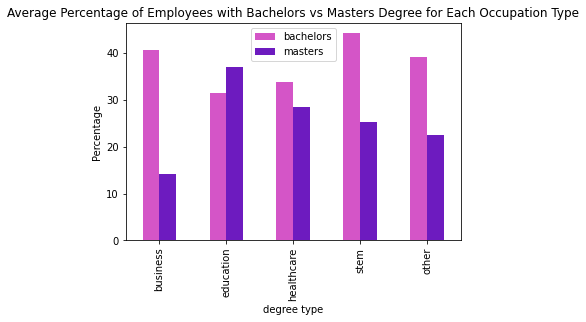

In [ ]:
c_list = ['#d455c7', '#6d1bbf']
percent_degrees.plot(kind='bar', color=c_list, title='Average Percentage of Employees with Bachelors vs Masters Degree for Each Occupation Type', ylabel='Percentage')

In [ ]:
wages_degrees = pd.DataFrame({'degree type':['business', 'education','healthcare','stem','other'],
                                'bachelors':[business_df.iloc[:,4].mean(), education_df.iloc[:,4].mean(), healthcare_df.iloc[:,4].mean(), stem_df.iloc[:,4].mean(), other_df.iloc[:,4].mean()],
                                'masters':[business_df.iloc[:,5].mean(), education_df.iloc[:,5].mean(), healthcare_df.iloc[:,5].mean(), stem_df.iloc[:,5].mean(), other_df.iloc[:,5].mean()]})
wages_degrees.set_index('degree type', inplace=True)
wages_degrees

,bachelors,masters
degree type,,
business,69285.714286,104000.000000
education,42842.857143,55000.000000
healthcare,51857.142857,67857.142857
stem,64000.000000,79142.857143
other,55471.428571,68000.000000


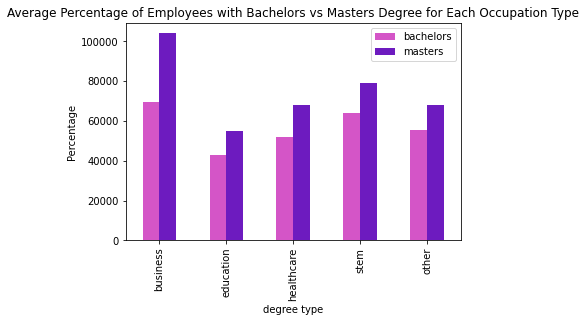

In [ ]:
c_list = ['#d455c7', '#6d1bbf']
wages_degrees.plot(kind='bar', color=c_list, title='Average Percentage of Employees with Bachelors vs Masters Degree for Each Occupation Type', ylabel='Percentage')

#Statistical Tests

In [ ]:
business_df.name = 'business'
education_df.name = 'education'
healthcare_df.name = 'healthcare'
stem_df.name = 'stem'
other_df.name = 'other'

# First, test the statistical difference in percent of people with bachelors vs masters
print("Percent of People with Bachelors vs Masters")
for df in [business_df, education_df, healthcare_df, stem_df, other_df]:
  t_score, p_value = ttest_ind(df.iloc[:,1].to_list(), df.iloc[:,3].to_list())
  print(df.name)
  print('T Score: {}'.format(t_score))
  print('P value: {}'.format(p_value))

Percent of People with Bachelors vs Masters
business
T Score: 4.874613900648753
P value: 0.00038198459703886483
education
T Score: -0.7798440467844057
P value: 0.4505906315716953
healthcare
T Score: 0.8422981057316321
P value: 0.41609303457093194
stem
T Score: 3.75780188939157
P value: 0.0027318394249562284
other
T Score: 1.586496177083649
P value: 0.1386121406954256


In [ ]:
# Next, test statistical difference in wage differences

print("Wage Difference for Bachelors vs Masters")
for df in [business_df, education_df, healthcare_df, stem_df, other_df]:
  t_score, p_value = ttest_ind(df.iloc[:,4].to_list(), df.iloc[:,5].to_list())
  print(df.name)
  print('T Score: {}'.format(t_score))
  print('P value: {}'.format(p_value))

Wage Difference for Bachelors vs Masters
business
T Score: -2.653295938024537
P value: 0.021050507212566173
education
T Score: -2.717971448210832
P value: 0.01867780258276984
healthcare
T Score: -1.757308716240628
P value: 0.10432327299759175
stem
T Score: -2.3922625699816367
P value: 0.03399480920228795
other
T Score: -1.0548169496820192
P value: 0.31228427225781413


# Write Up and Conclusions


The question being examined in this investigation was based on percentage of employees with masters as an indication of necessity paired with how much wages are increased, in what categories of occupations is it most valuable to pursue a masters degree?

This question is built on the investigation of two sectors: the percentage of people in a occupation field who have a bachelors versus a masters degree, and the wage increase between having a bachelors versus a masters in a specific occupation field. The reason these two sectors are being investigated is because percentage of people in a field who have a masters degree may serve as an indication of how necessary and accessbible obtaining a masters degree is in a given field, and wage increase serves as an indicator of payoff of receiving a higher degree in a field. 

As such, the independent variables of this investigation are the occupation fields and whether or not a person had a bachelors vs a masters degree, and the dependent variables are the percentage of employees with a bachelors or masters and the wages of each respective degree for a given field. The occupation fields being investigated are business, education, healthcare, STEM, and other. Each of these blanket fields has subfields containing different specific types of occupations, however, these subfields will be ignored for purposes of consolidating the investigation.

In order to investigate this question, I utilized the data from the "Should I Get a Masters Degree?" article provided in the assignment instructions from the U.S. Bureau of Labor Statistics: https://www.bls.gov/careeroutlook/2015/article/should-i-get-a-masters-degree.htm. This webpage contains five different tables containing data relevant to each occupation field, including the number employed with a bachelors degree, the percentage in the field with a bachelors degree, the number employed with a masters degree, the percentage in the field with a masters degree, the median annual wage of those with a bachelors degree, the median annual wage of those with a masters degree, wage premium amount, and wage premium percent. Each occupation field reads a list of occupation categories as the rows of the table. For example, the business table contains occupations such as financial managers, logisticians, and marketing and sales managers. Some of the limitations of this page is that this dataset is not fully comprehensive of all occupations both within fields and as a whole, and is fairly generalized, however, it is valuable for drawing an approximate and general conclusion about masters degrees in different types of occupation fields. 

Using Python's BeautifulSoup and requests functionality, following the examples from provided lecture notebooks, I read in the HTML from this article and printed the tags in order to locate the relevant tags containing information from the data tables. After locating the relevant tags, I wrote a loop to go through the HTML and pull out relevant information and parse it into respective Pandas dataframes for each occupation field. I had some difficulties understanding and writing the code to parse the data into the dataframe at first because the values were ordered by row instead of column, so I had to parse through and add the values to a respective column list in order to initialize the dataframe. I could have parsed it in as rows and then transposed the dataframe, but the solution I created was more intuitive and understandable for me. This scraping approach is limited in that it was heavily reliant on being able to find the relevant tags and the fact that the webpage and datasets were fairly small. With larger pages or datasets, this would have been far more difficult. In addition, this webpage was nicely organized in that the tags needed to find the data values did not align to any other irrelevant information and it was easy to cut out the little extraneous information they did return. Because of this, it was not too difficult to narrow down the search of the tags. 

For data cleaning, I opted to add this into my parsing loop for ease of use. From looking at the webpage and problem solving my code, it was clear to see there would be two main problems with the data. First, the data being parsed in was of string type rather than integer. Second, some random values in the dataframes had extraneous symbols such as percent signs, dollar signs, or commas. These symbols were not consistent and made it more difficult to parse the values into integer type. At first to solve this problem, I started to write a function to loop over the values in a dataframe and replace them with a "cleaned" type- one that didn't contain extraneous symbols and was of the integer data type. However, I soon began to realize that this would be a lot simplier if I wrote this cleaner into the initial loop running over the HTML. So, as a value was being parsed into the dataframe, I added functionality that would remove the symbols and convert it to an integer type before adding it to the dataframe. In addition, I reset the indices of the dataframes so that they ran off of their respective occupation subfields as an index rather than just an auto-incrementing list of integers, which would be meaningless in this context. 

After cleaning the data, I went through the dataframes and double checked all of the data and metadata to ensure there were no null values and that all the data had parsed properly in order to follow the EDA. 

Next, I developed visualizations to help get a better idea of the differences between bachelors and masters in each occupation field for the two dependent variables, percentage employed with each type of degree and wage increase. In order to do this, I used a bar chart with different colors for bachelors vs masters to show the mean values for each for each occupation field. 

For the perecentage employed by each degree type, there is a large percentage dominance in bachelors degrees for business, STEM, and other. The only field where masters degrees have dominance in is education. Healthcare has a smaller difference in degree type, with slight dominance in bachelors. This indicates that is is more necessary to have a masters degree in education, but for business, STEM, and other, it is less necessary, and for healthcare, it is not completely necessary but may be helpful. 

For the wage increase, every occupation field has a higher median wage for those with masters, as expected. However, for education, healthcare, STEM, and other, the increase is fairly similar between the fields with an increase of about 10,000-20,000 dollars. For business, however, the increase is much more noticable, with an increase of about 40,000 dollars. This implies that buiness would be the most beneficial field to pursue a masters in based on wage increase. 

To confirm the indications provided in the visualizations, I ran separate t-tests for each occupation field for bachelors vs masters for percentage and wage. I chose to run ttests because then I was able to compare the sample means of each list (bachelors vs masters) for each occupation field to see if there was a statistical difference between them and how significant the difference was, without knowning the population mean. We will assume the variables are iid for the purposes of this investigation. The results were as follows:

**Percent of People with Bachelors vs Masters:**

business
* T Score: 4.874613900648753
* P value: 0.00038198459703886483

education
* T Score: -0.7798440467844057
* P value: 0.4505906315716953

healthcare
* T Score: 0.8422981057316321
* P value: 0.41609303457093194

stem
* T Score: 3.75780188939157
* P value: 0.0027318394249562284

other
* T Score: 1.586496177083649
* P value: 0.1386121406954256

**Wage Difference for Bachelors vs Masters:**

business
* T Score: -2.653295938024537
* P value: 0.021050507212566173

education
* T Score: -2.717971448210832
* P value: 0.01867780258276984

healthcare
* T Score: -1.757308716240628
* P value: 0.10432327299759175

stem
* T Score: -2.3922625699816367
* P value: 0.03399480920228795

other
* T Score: -1.0548169496820192
* P value: 0.31228427225781413

If an alpha value of 0.05 is utilized, these tests indicate that business and STEM have a statistically significant difference in percentages with different degrees, where business has the lowest p-value and is therefore more statistically significant. For wages differences by degree type, business, education, and STEM have statistically significant differences, with the most statistically signficant difference in education, then business, then STEM. 

With the information provided by the visualizations and the statistical tests, it can be concluded that a masters degree is the most valuable to obtain in the occupational field of business. Although it is not required and fewer people in this field obtain a masters degree, this occupational field has the highest opportunity for a significant increase in wages, deeming this field more valuable to have a masters degree than other occupational fields. 